In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, CuDNNLSTM

In [3]:
air = pd.read_csv('../data/AirPassengers.csv')
air

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [4]:
air.set_index('Month', inplace=True)
air

,#Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1960-08,606
1960-09,508
1960-10,461


In [5]:
air.columns

Index(['#Passengers'], dtype='object')

In [6]:
air_ts = air['#Passengers'].values.reshape(-1,1)
air_ts

array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119],
       [104],
       [118],
       [115],
       [126],
       [141],
       [135],
       [125],
       [149],
       [170],
       [170],
       [158],
       [133],
       [114],
       [140],
       [145],
       [150],
       [178],
       [163],
       [172],
       [178],
       [199],
       [199],
       [184],
       [162],
       [146],
       [166],
       [171],
       [180],
       [193],
       [181],
       [183],
       [218],
       [230],
       [242],
       [209],
       [191],
       [172],
       [194],
       [196],
       [196],
       [236],
       [235],
       [229],
       [243],
       [264],
       [272],
       [237],
       [211],
       [180],
       [201],
       [204],
       [188],
       [235],
       [227],
       [234],
       [264],
       [302],
       [293],
       [259],
       [229],
       [203],
      

# Scaling (MinMaxScaler between 0 and 1 )

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler(feature_range = (0, 1))
air_ts = scaler.fit_transform(air_ts)

In [9]:
air_ts

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

# Prepare data using shift(1)

In [10]:
df = pd.DataFrame()
df['t'] = air_ts.flatten()
df['t+1'] = df.t.shift(-1)
df

,t,t+1
0,0.015444,0.027027
1,0.027027,0.054054
2,0.054054,0.048263
3,0.048263,0.032819
4,0.032819,0.059846
...,...,...
139,0.969112,0.779923
140,0.779923,0.689189
141,0.689189,0.552124
142,0.552124,0.633205


In [11]:
df.dropna(inplace=True)

# x and y split

In [12]:
x = df['t+1']
y = df['t']

# Split into train and test datasets

In [13]:
x_train = x[:int(len(x)*.8)]
x_test = x[int(len(x)*.8):]

In [14]:
y_train = y[:int(len(y)*.8)]
y_test = y[int(len(y)*.8):]

In [15]:
print(f'x_train: {x_train.shape}\nx_test: {x_test.shape}\n\ny_train: {y_train.shape}\ny_test:{y_test.shape}')

x_train: (114,)
x_test: (29,)

y_train: (114,)
y_test:(29,)


# Reshape input data to be [samples, time steps, features]

In [16]:
x_train = x_train.values.reshape(x_train.shape[0],
                                 1,
                                 1) # <-- x_train.shapep[1]

x_test = x_test.values.reshape(x_test.shape[0],
                               1,
                               1) # <-- x_test.shape[1]

# Build a model (4 units of LSTM, 1 Dense layer)

In [17]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

Using TensorFlow backend.


In [18]:
model = Sequential()
model.add(LSTM(4, 
               activation = 'relu',
               input_shape=(1,1))) #timesteps, n_features
model.add(Dense(1))

# compile with adam optimizer and mse loss

In [19]:
model.compile(optimizer='adam',
              loss = 'mse')

# Fit the model (100 epochs and 1 batch size)

In [20]:
history = model.fit(x_train,
                    y_train, 
                    epochs =100,
                    batch_size = 1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





114/114 [==============================] - 1s 11ms/step - loss: 0.0752
Epoch 2/100
114/114 [==============================] - 0s 2ms/step - loss: 0.0425
Epoch 3/100
114/114 [==============================] - 0s 2ms/step - loss: 0.0294
Epoch 4/100
114/114 [==============================] - 0s 2ms/step - loss: 0.0252
Epoch 5/100
114/114 [==============================] - 0s 2ms/step - loss: 0.0236
Epoch 6/100
114/114 [==============================] - 0s 2ms/step - loss: 0.0224
Epoch 7/100
114/114 [==============================] - 0s 2ms/step - loss: 0.0213
Epoch 8/100
114/114 [==============================] - 0s 2ms/step - loss: 0.0202
Epoch 9/100
114/114 [==============================] - 0s 2ms/step - loss: 0.0189
Epoch 10/100
114/114 [==============================] - 0s 2ms/step - loss: 0.0177
Epoch 11/100
114/114 [==============================] - 0s 2ms/step - loss: 

# Prediction using test dataset

In [21]:
y_pred = model.predict(x_test)
y_pred

array([[0.77413404],
       [0.5475701 ],
       [0.4554503 ],
       [0.3612505 ],
       [0.412377  ],
       [0.45743862],
       [0.4220542 ],
       [0.55179083],
       [0.5307955 ],
       [0.5816402 ],
       [0.6972192 ],
       [0.87835854],
       [0.9058838 ],
       [0.6766795 ],
       [0.55390525],
       [0.4614232 ],
       [0.5496791 ],
       [0.5751989 ],
       [0.52039915],
       [0.5794903 ],
       [0.6721457 ],
       [0.6972192 ],
       [0.84628403],
       [1.0704166 ],
       [1.0275103 ],
       [0.7812324 ],
       [0.6721457 ],
       [0.5183279 ],
       [0.60765094]], dtype=float32)

# 표준화한 예측값을 다시  원래값으로 돌릴때

In [25]:
y_pred_test = scaler.inverse_transform(model.predict(x_test))
y_test_inverse = scaler.inverse_transform(y_test.values.reshape(-1,1))

In [26]:
y_pred_train = scaler.inverse_transform(model.predict(x_train))
y_train_inverse = scaler.inverse_transform(y_train.values.reshape(-1,1))

# Calculate the root mean squared error

In [24]:
model.evaluate(x_test, y_test)

29/29 [==============================] - 0s 5ms/step


0.013270002789795399

In [29]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test_inverse, y_pred_test)
mse

3560.6596503190954

In [30]:
np.sqrt(mse)

59.671263186890016

# Visualize the result

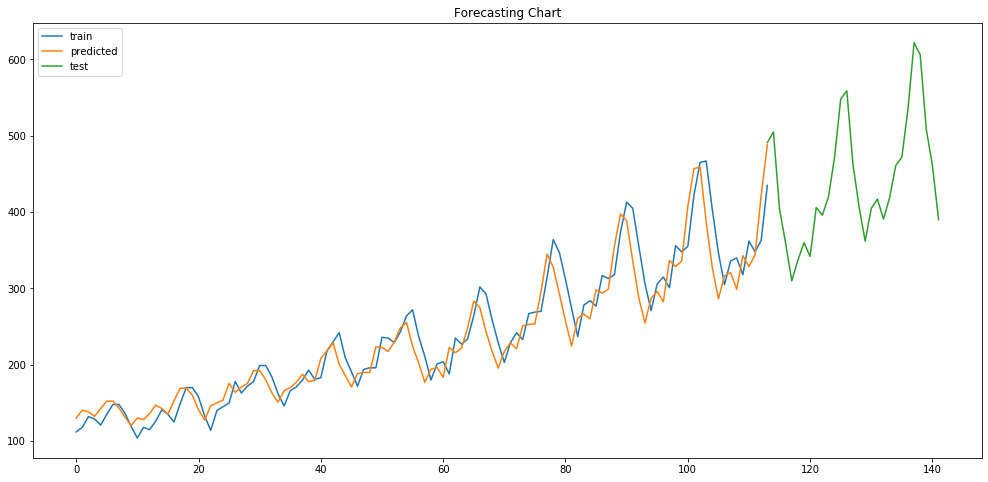

In [41]:
plt.figure(figsize = (17,8))

plt.title('Forecasting Chart')
plt.plot(y_train_inverse, label = 'train')
plt.plot(y_pred_train, label = 'predicted')
plt.plot(np.arange(113,113+len(y_test)), y_test_inverse, label = 'test')

plt.legend(loc='best')